In [1]:
import sys
sys.path.insert(0, '/Users/kedzie/Documents/Berkeley/notebooks/utilities')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections.abc import Iterable

from utility_functions.utils import * #read_data, read_press, getnearpos, folder_files, headspace
from matplotlib import rcParams as rc
rc['mathtext.default'] = 'regular'
rc['font.family'] = 'sans-serif'
rc['font.sans-serif'] = ['Verdana']


charge current (mA): 0.499954375
total moles of gas consumed: 37.23100344650578
total moles of gas evolved: 34.69342446007687
e- per mol on charge: 1.048728319026886
e- per mol on discharge: 1.0029515066424433
discharge capacity: 0.9998992416593764
charge capacity: 0.9767147960762181
charge time (h) : 6.0726506486994705
charge cap= 0.9767147960762181
oer/orr: 0.9318423155025903
final current= 0.0051008458
charge current (mA): 0.4999492255813953
total moles of gas consumed: 37.9202172425837
total moles of gas evolved: 35.917033235565384
e- per mol on charge: 1.0463626868258296
e- per mol on discharge: 0.9829697376383247
discharge capacity: 0.9998181131150988
charge capacity: 1.0050310649805598
charge time (h) : 5.113796215864066
charge cap= 1.0050310649805598
oer/orr: 0.9471737201766666
final current= 0.0051021175
charge current (mA): 0.4998951945238095
total moles of gas consumed: 37.48155057356031
total moles of gas evolved: 34.5876431577489
e- per mol on charge: 1.0654545392159973
e-

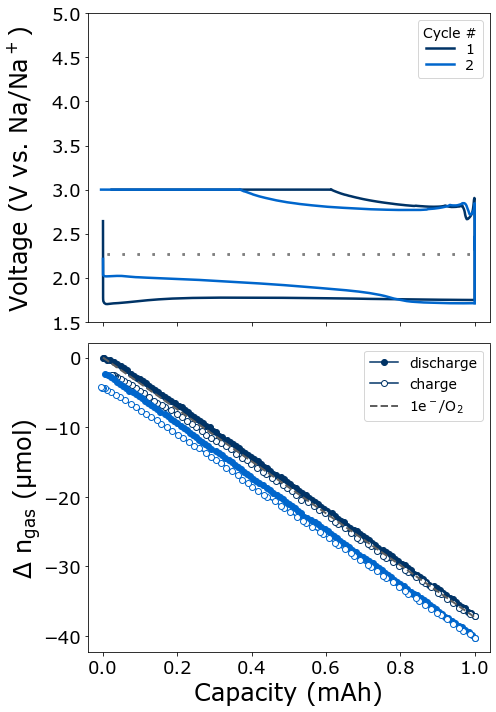

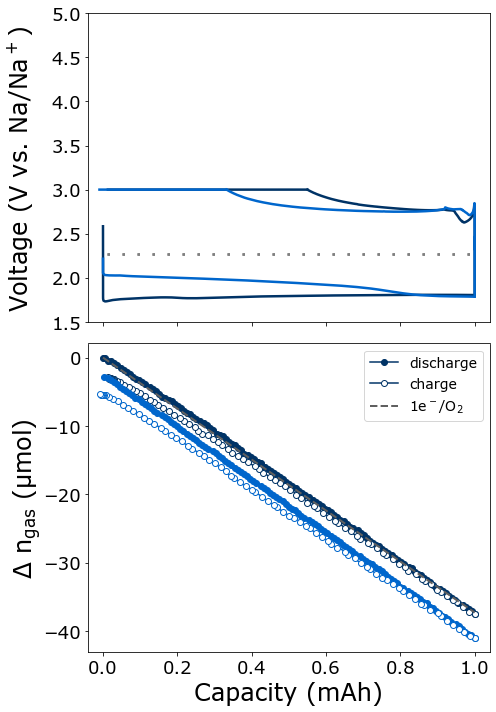

In [5]:
graphite1 = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200708_Na_MCMB0203_cycling_CA_cell2/')
gp1 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200708_Na_MCMB0203_cycling_CA_cell2/200708_Na_MCMB0203_cycling_CA_cell2_Ch4__2020-07-08_11.55_14.txt')
gp2 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200708_Na_MCMB0203_cycling_CA_cell2/200708_Na_MCMB0203_cycling_CA_cell2_cycle2_Ch4__2020-07-08_21.50_43.txt')

fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10)) 
o1=plot_CA_cycles(graphite1[1], graphite1[3], graphite1[4], graphite1[5], gp1, 4, 1, offset=0)
o2=plot_CA_cycles(graphite1[8], graphite1[10], graphite1[11], graphite1[12], gp2, 4, 2, offset=o1)
leg = ax.legend(fontsize=14, loc='upper right', labelspacing=0.15)
leg.set_title('Cycle #',prop={'size':14})
ax2.legend(labels=['discharge', 'charge', '1e$^-/O_2$'], fontsize=14)


graphite2=folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200708_Na_MCMB0203_cycling_CA_cell1/')
g1 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200708_Na_MCMB0203_cycling_CA_cell1/200708_Na_MCMB0203_cycling_CA_cell1_Ch3__2020-07-08_11.54_42.txt')
g2= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200708_Na_MCMB0203_cycling_CA_cell1/200708_Na_MCMB0203_cycling_CA_cell1_cycle2_Ch3__2020-07-08_21.50_33.txt')

fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10)) 
of1=plot_CA_cycles(graphite2[1], graphite2[3], graphite2[4], graphite2[5], g1, 3, 1, offset=0)
of2=plot_CA_cycles(graphite2[8], graphite2[10], graphite2[11], graphite2[12], g2, 3, 2, offset=of1)

leg.set_title('Cycle #',prop={'size':14})
ax2.legend(labels=['discharge', 'charge', '1e$^-/O_2$'], fontsize=14)




charge current (mA): 0.500110401845238
total moles of gas consumed: 40.15396571056307
total moles of gas evolved: -29.134873362964115
e- per mol on charge: -1.0911980638349357
e- per mol on discharge: 0.9260641812166562
discharge capacity: 0.9995890988243952
charge capacity: 0.8414361543125577
charge time (h) : 8.016531674522835
charge cap= 0.8414361543125577
oer/orr: -0.7255789770049978
final current= 0.0043141274


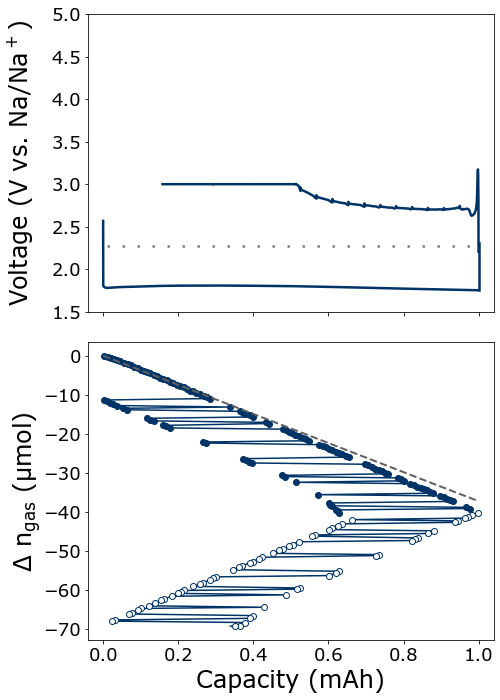

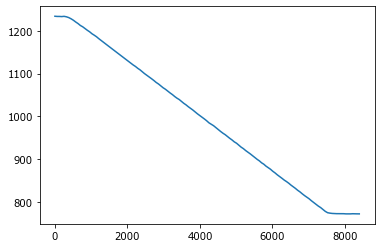

In [7]:

def plot_CA_cycles(discharge, cp1, cp2, ca, press, ch, cyclenum=1, leg=None, offset=0, n=1):
    
    i_dis = -1*np.mean( discharge['I/mA'] ) #calculate discharge and charge current (mA)
    i_ch = np.mean(cp1['I/mA'])
    print('charge current (mA): ' + str(i_ch))
    cp2['Capacity/mA.h'] = cp2['Capacity/mA.h'] + cp1['Capacity/mA.h'].iloc[-1]
    ca['Capacity/mA.h'] = ca['Capacity/mA.h'] + cp2['Capacity/mA.h'].iloc[-1]   
    umoles = press['pressure/torr']/760*headspace(ch)/(press['temperature/C']+273)/0.082057
    umoles = umoles-umoles.iloc[0]
    col = ['#003366', '#0066CC', '#3399FF', '#99CCFF']
    
    cap = []; curr = []
    files_ec = pd.concat([discharge, cp1, cp2, ca], sort=True) 
    
    for i in range(len(umoles)):
        dex = getnearpos( files_ec['time/s'], press['time/s'].iloc[i] )
        cap.append( files_ec['Capacity/mA.h'].iloc[dex] )
        curr.append( files_ec['I/mA'].iloc[dex] )

    umolesdf = pd.DataFrame( press['time/s'], columns=['time/s'] )
    umolesdf['umoles'] = umoles
    umolesdf['Capacity/mA.h'] = cap
    umolesdf['I/mA'] = curr
    
    st1= discharge['time/s'].iloc[0]
    end1= discharge['time/s'].iloc[-1]
    st2=cp1['time/s'].iloc[0]
    end2=cp1['time/s'].iloc[-1]
    st3=cp2['time/s'].iloc[0]
    end3=cp2['time/s'].iloc[-1]
    st4=ca['time/s'].iloc[0]
    end4=ca['time/s'].iloc[-1]
    end_cap = [discharge['Capacity/mA.h'].iloc[-1], cp1['Capacity/mA.h'].iloc[-1], cp2['Capacity/mA.h'].iloc[-1], ca['Capacity/mA.h'].iloc[-1]]

    ax.plot((discharge['Capacity/mA.h']), discharge['Ewe/V'], c=col[cyclenum-1], linestyle='-', linewidth=2.5, label = cyclenum )
    ax.plot([end_cap[0], end_cap[0]-cp1['Capacity/mA.h'].iloc[5] ], [discharge['Ewe/V'].iloc[-1], cp1['Ewe/V'].iloc[5] ], c=col[cyclenum-1], linestyle='-', linewidth=2.5, label='') #this line just connects the discharge to charge lines
    ax.plot(end_cap[0]-cp1['Capacity/mA.h'], cp1['Ewe/V'], color=col[cyclenum-1], label='', linewidth=2.5)
    ax.plot(end_cap[0]-cp2['Capacity/mA.h'], cp2['Ewe/V'], color=col[cyclenum-1] , label='', linewidth=2.5)
    ax.plot(end_cap[0]- ca['Capacity/mA.h'], ca['Ewe/V'], color= col[cyclenum-1], linewidth=2.5, label='') 
    ax.plot([0.01, 1.0],[2.27,2.27], c='grey', linestyle=(0,(1,5)), linewidth=2.5, label='')
#     ax3.plot(end_cap[0]-cp1['Capacity/mA.h'], cp1['I/mA'], color = '#EE7733', linestyle='--', linewidth=2.5)
#     ax3.plot(end_cap[0]-cp2['Capacity/mA.h'], cp2['I/mA'], color = '#EE7733', linestyle='--', linewidth=2.5)
#     ax3.plot(end_cap[0]-ca['Capacity/mA.h'], ca['I/mA'], color = '#EE7733', linestyle='--', linewidth=2.5)

    st_p1 = getnearpos(press['time/s'],st1) #find time at beginning of discharge
    end_p1 = getnearpos(press['time/s'],end1) #find time at end of discharge
    
    st_p2 = getnearpos(press['time/s'],st2) #start of charge cp1
    end_p2 = getnearpos(press['time/s'],end2)
    
    st_p3 = getnearpos(press['time/s'],st3)
    end_p3 = getnearpos(press['time/s'],end3)
    
    st_p4 = getnearpos(press['time/s'],st4)
    end_p4 = getnearpos(press['time/s'],end4) #end of charge chronoamperometry
    
    umolesdf['umoles'] = umolesdf['umoles']-umolesdf['umoles'].iloc[st_p1]
    
    x=[0, end_cap[0]]
    y=[0+offset,-end_cap[0]*3.6/n/96485*10**6+offset]
    orr = -umolesdf['umoles'].iloc[end_p1]+umoles.iloc[st_p1]
    oer = umoles.iloc[end_p4-5]-umoles.iloc[st_p2]
    print('total moles of gas consumed: ' + str(orr))
    print('total moles of gas evolved: ' + str(oer))
    
    epermol = ca['Capacity/mA.h'].iloc[-1] * 3.6 / 96485 *10**6 / (umoles[end_p4-1]-(umoles[st_p2+1]))
    epermold = discharge['Capacity/mA.h'].iloc[-1] * 3.6 / 96485 *10**6 / (umoles[st_p1]-(umoles[end_p1+1]))
    
    print("e- per mol on charge: " + str(epermol))
    print("e- per mol on discharge: " + str(epermold))
    print('discharge capacity: ' + str(discharge['Capacity/mA.h'].iloc[-1]))
    print('charge capacity: ' + str(ca['Capacity/mA.h'].iloc[-1]))
    print('charge time (h) : ' + str((ca['time/s'].iloc[-1]- cp1['time/s'].iloc[0])/3600))
    print('charge cap= ' + str( ca['Capacity/mA.h'].iloc[-1] ) )
    print('oer/orr: ' + str( oer/orr ))
    print('final current= ' + str(ca['I/mA'].iloc[-1]))
    pressure_gap=umoles.iloc[end_p1]-umoles.iloc[st_p2]
    
    ax2.plot(umolesdf['Capacity/mA.h'][st_p1:end_p1+1], umolesdf['umoles'][st_p1:end_p1+1]+offset,  'o-', color= col[cyclenum-1], linewidth=1.5, markersize=6, label='')#, markevery=(0.0,0.02))
    ax2.plot(end_cap[0]-umolesdf['Capacity/mA.h'][st_p2:end_p4-1], (umolesdf['umoles'])[st_p2:end_p4-1]+pressure_gap+offset,  'o-', color=col[cyclenum-1], linewidth=1.5, markersize=6, mfc='white', markevery=(0.0,0.011), label='')
    if cyclenum ==1:
        ax2.plot(x,y, color='#606060', linestyle='--', label= '',linewidth= 2)
    
    ax.set_ylabel('Voltage (V vs. Na/Na$^+$)', fontsize=24, labelpad = 14 )
    ax2.set_ylabel('$\Delta$ n$_{gas}$ ($\mu$mol)', fontsize=24, labelpad=0)
    ax2.set_xlabel('Capacity (mAh)', fontsize=24)
    #ax3.set_ylabel('Current (mA))', fontsize=24, color='#EE7733' )
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax2.tick_params(axis='both', which='major', labelsize=18)
    #ax3.tick_params(axis='both', which='major', labelsize=18)
    ax.set_ylim([1.5,5])
    ax.set_xlim([-0.04,1.04])
    if n==2:
        ax.set_ylim([2.5,4])
        ax.set_ylabel('Voltage (V vs. Li/Li$^+$)')
    plt.tight_layout()
    return ( umolesdf['umoles'][end_p4-1]+pressure_gap )


sodium = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200706_Na_MCMB031220_CA_cell1_dems/')
disch= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200706_Na_MCMB031220_CA_cell1_dems/200706_Na_MCMB031220_CA_cell1_dems_disch1_Ch1_fixed.txt')
fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10)) 
mcmb312 = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200629_Na_MCMB0312_CA_cell1/')


plot_CA_cycles(sodium[6], sodium[1], sodium[2], sodium[3], disch, 'dems1', offset=0)

plt.figure()
plt.plot(disch['time/s'], disch['pressure/torr'])

charge current (mA): 0.49994438458333335
total moles of gas consumed: 36.748675618212815
total moles of gas evolved: 34.77015327394027
e- per mol on charge: 1.0529146194381418
e- per mol on discharge: 1.012109838497595
discharge capacity: 0.9997838073306612
charge capacity: 0.9749905185567007
charge time (h) : 5.696240486590071
charge cap= 0.9749905185567007
oer/orr: 0.9461607170601821
final current= 0.005093431099999999
charge current (mA): 0.49992796500000003
total moles of gas consumed: 37.52925215084336
total moles of gas evolved: 35.375249376854796
e- per mol on charge: 1.0616031314306782
e- per mol on discharge: 0.9899071678898883
discharge capacity: 0.999804801411099
charge capacity: 1.0077331194447146
charge time (h) : 6.224988313521755
charge cap= 1.0077331194447146
oer/orr: 0.9426046976547556
final current= 0.0050317324
charge current (mA): 0.4999066087804878
total moles of gas consumed: 37.607460969692525
total moles of gas evolved: 21.153462648051274
e- per mol on charge: 1

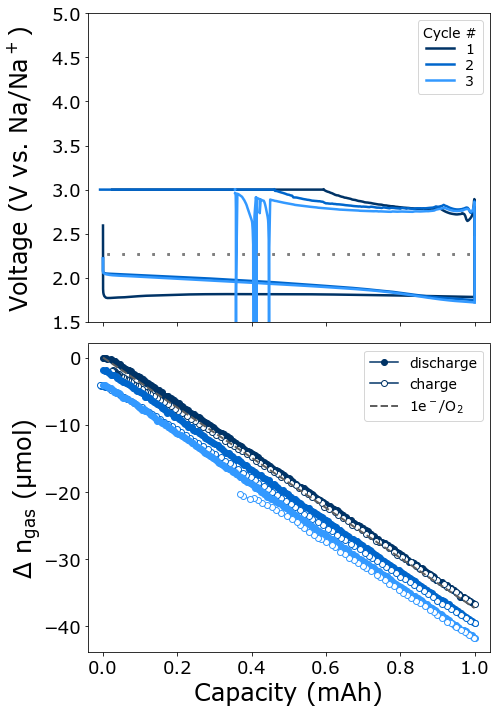

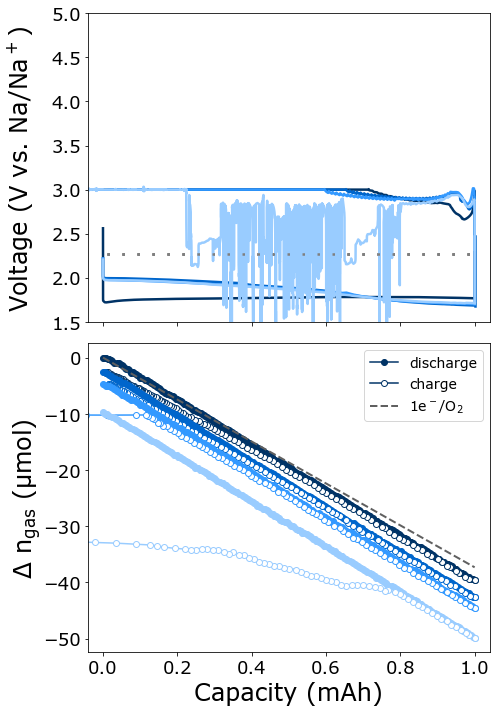

In [17]:
mcmb312 = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200629_Na_MCMB0312_CA_cell1/')
p1 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200629_Na_MCMB0312_CA_cell1/200629_Na_MCMB0312_CA_cycling_cell1_cycle1_Ch3__2020-06-29_09.05_46.txt')
p2 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200629_Na_MCMB0312_CA_cell1/200629_Na_MCMB0312_CA_cycling_cell1_cycle2_Ch3__2020-06-29_18.48_43.txt')
p3 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200629_Na_MCMB0312_CA_cell1/200629_Na_MCMB0312_CA_cycling_cell1_cycle3_Ch3__2020-06-30_08.48_45.txt')

fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10)) 

offset1 = plot_CA_cycles(mcmb312[1], mcmb312[3], mcmb312[4], mcmb312[5], p1, 3, 1 )
offset2 = plot_CA_cycles(mcmb312[8], mcmb312[10], mcmb312[11], mcmb312[12], p2, 3, 2, offset = offset1)
offset3 = plot_CA_cycles(mcmb312[15], mcmb312[17], mcmb312[18], mcmb312[19], p3, 3, 3,offset = offset1 + offset2)
#plot_CA_cycles(mc2_cycles[22], mc2_cycles[24], mc2_cycles[25], mc2_cycles[26], mc2_4, 2, 4, '#99CCFF',offset=o1+o2+o3)

leg = ax.legend(fontsize=14, loc='upper right', labelspacing=0.15)
leg.set_title('Cycle #',prop={'size':14})
ax2.legend(labels=['discharge', 'charge', '1e$^-/O_2$'], fontsize=14)

cell2 = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200629_Na_MCMB0312_CA_cell2/')
c2p1= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200629_Na_MCMB0312_CA_cell2/200629_Na_MCMB0312_CA_cycling_cell2_cycle1_Ch4__2020-06-29_09.06_09.txt')
c2p2 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200629_Na_MCMB0312_CA_cell2/200629_Na_MCMB0312_CA_cycling_cell2_cycle2_Ch4__2020-06-29_23.27_51.txt')
c2p3 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200629_Na_MCMB0312_CA_cell2/200629_Na_MCMB0312_CA_cycling_cell2_cycle3_Ch4__2020-06-30_10.10_24.txt')
c2p4 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200629_Na_MCMB0312_CA_cell2/200629_Na_MCMB0312_CA_cycling_cell2_cycle4_Ch4__2020-06-30_16.33_04.txt')


fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10)) 

o1 = plot_CA_cycles(cell2[1], cell2[3], cell2[4], cell2[5], c2p1, 4, 1 )
o2 = plot_CA_cycles(cell2[8], cell2[10], cell2[11], cell2[12], c2p2, 4, 2, offset = o1)
o3 = plot_CA_cycles(cell2[15], cell2[17], cell2[18], cell2[19], c2p3, 4, 3, offset = o1 + o2)
plot_CA_cycles(cell2[22], cell2[24], cell2[25], cell2[26], c2p4, 4, 4, offset= o1+o2+o3)

leg.set_title('Cycle #',prop={'size':14})
ax2.legend(labels=['discharge', 'charge', '1e$^-/O_2$'], fontsize=14)





charge current: 0.5000366745161291
total moles of gas consumed: 18.74231079747922
total moles of gas evolved: -33.38116408314056
e- per mol on charge: -1.0163791171583871
e- per mol on discharge: 2.0194421391552164
discharge capacity: 0.9998310936821831
charge capacity: 0.9097264458735784
charge time (h) : 12.93960576986032
charge cap= 0.9097264458735784
oer/orr: -1.6218912671164123
final current= 0.0050893952
charge current: 0.5000109272131147
total moles of gas consumed: 18.478501460199354
total moles of gas evolved: 10.35147114611324
e- per mol on charge: 2.42499746548708
e- per mol on discharge: 2.0138874492099634
discharge capacity: 0.999902023209466
charge capacity: 0.6749429305394491
charge time (h) : 31.79706944451816
charge cap= 0.6749429305394491
oer/orr: 0.4824647576299693
final current= 0.00502769


-8.107794782806153

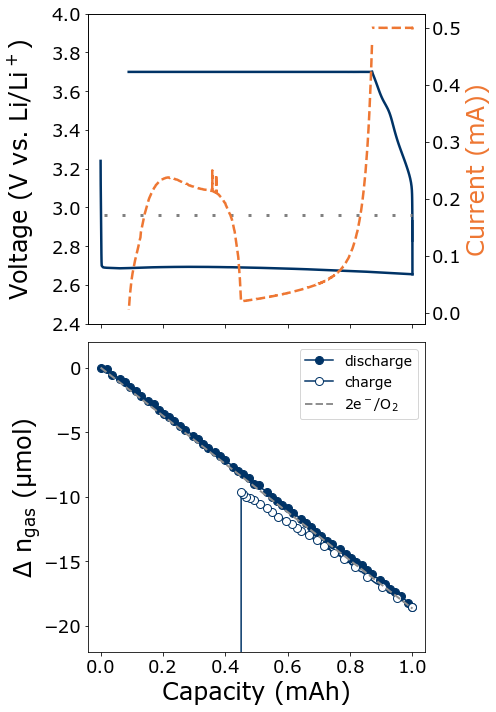

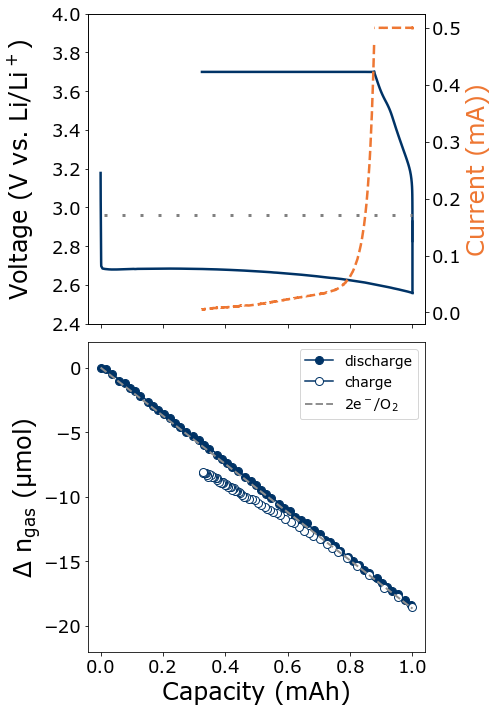

In [5]:
# liCA37_press = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200624_Li_CA_3.7V_LiNO3_cell1/200624_Li_CA_3.7V_LiNO3_cell1_pressure_Ch1__2020-06-24_15.09_48.txt')
# liCA37 = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200624_Li_CA_3.7V_LiNO3_cell1/')
# plot_CA_lithium(liCA37[1], liCA37[3], liCA37[4], liCA37_press, 2, 1, n=2 )
# #plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200624_Li_CA_3.7V_LiNO3_cell1/200624_Li_CA_3.7V_LiNO3_cell1.png', transparent= True, dpi=800, bbox_inches='tight')


# liCA37_press2 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200624_Li_CA_3.7V_LiNO3_cell2/200624_Li_CA_3.7V_LiNO3_cell2_press_Ch2__2020-06-24_15.10_20.txt')
# liCA372 = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200624_Li_CA_3.7V_LiNO3_cell2/')
# plot_CA_lithium(liCA372[1], liCA372[3], liCA372[4], liCA37_press2, 1, 1, n=2 )

# #plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200624_Li_CA_3.7V_LiNO3_cell2/200624_Li_CA_3.7V_LiNO3_cell2.png', transparent= True, dpi=800, bbox_inches='tight')

# liCA3p = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200629_Li_CA_3.7V_LiNO3_cell1/200629_Li_CA_3.7V_LiNO3_cell1_Ch2__2020-06-29_15.32_51.txt')
# liCA3 = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200629_Li_CA_3.7V_LiNO3_cell1/')
# plot_CA_lithium(liCA3[1], liCA3[3], liCA3[4], liCA3p, 2, 1, n=2 )

# plt.figure()
# plt.plot(liCA3p['time/s'], liCA3p['pressure/torr'])

liCA4p = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200701_Li_CA_3.7V_LiNO3/200701_Li_CA_3.7V_LiNO3_pressure_Ch4__2020-07-01_15.53_06.txt')
liCA4 = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200701_Li_CA_3.7V_LiNO3/')
plot_CA_lithium(liCA4[1], liCA4[3], liCA4[4], liCA4p, 4, 1, n=2 )
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200701_Li_CA_3.7V_LiNO3/200701_Li_CA_3.7V_LiNO3_brokenglass.png', transparent= True, dpi=800, bbox_inches='tight')




liCA5p = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200706_Li_CA_3.7V_LiNO3/200706_Li_CA_3.7V_LiNO3_pressure_Ch4__2020-07-06_12.45_51.txt')
liCA5 = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200706_Li_CA_3.7V_LiNO3/')
plot_CA_lithium(liCA5[1], liCA5[3], liCA5[4], liCA5p, 4, 1, n=2 )
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200706_Li_CA_3.7V_LiNO3/200706_Li_CA_3.7V_LiNO3.pdf', transparent= True, dpi=800, bbox_inches='tight')





In [3]:
def plot_CA_lithium(discharge, cp1, ca, press, ch, cyclenum=1, leg=None, offset=0, n=2):
    
    i_dis = -1*np.mean( discharge['I/mA'] ) #calculate discharge and charge current (mA)
    i_ch = np.mean(cp1['I/mA'])
    print('charge current: ' + str(i_ch))
    ca['Capacity/mA.h'] = ca['Capacity/mA.h'] + cp1['Capacity/mA.h'].iloc[-1]   
    umoles = press['pressure/torr']/760*headspace(ch)/(press['temperature/C']+273)/0.082057
    umoles = umoles-umoles.iloc[0]
    col = ['#003366', '#0066CC', '#3399FF', '#99CCFF']
    
    cap = []
    curr = []
    files_ec = pd.concat([discharge, cp1, ca], sort=True) 
    
    for i in range(len(umoles)):
        dex = getnearpos( files_ec['time/s'], press['time/s'].iloc[i] )
        cap.append( files_ec['Capacity/mA.h'].iloc[dex] )
        curr.append( files_ec['I/mA'].iloc[dex] )

    umolesdf = pd.DataFrame( press['time/s'], columns=['time/s'] )
    umolesdf['umoles'] = umoles
    umolesdf['Capacity/mA.h'] = cap
    umolesdf['I/mA'] = curr
    
    st1= discharge['time/s'].iloc[0]
    end1= discharge['time/s'].iloc[-1]
    st2=cp1['time/s'].iloc[0]
    end2=cp1['time/s'].iloc[-1]
#     st3=cp2['time/s'].iloc[0]
#     end3=cp2['time/s'].iloc[-1]
    st4=ca['time/s'].iloc[0]
    end4=ca['time/s'].iloc[-1]
    end_cap = [discharge['Capacity/mA.h'].iloc[-1], cp1['Capacity/mA.h'].iloc[-1], ca['Capacity/mA.h'].iloc[-1]]

    fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10))
    ax3=ax.twinx()

    ax.plot((discharge['Capacity/mA.h']), discharge['Ewe/V'], c=col[cyclenum-1], linestyle='-', linewidth=2.5, label = cyclenum )
    ax.plot([end_cap[0], end_cap[0]-cp1['Capacity/mA.h'].iloc[5] ], [discharge['Ewe/V'].iloc[-1], cp1['Ewe/V'].iloc[5] ], c=col[cyclenum-1], linestyle='-', linewidth=2.5, label='') #this line just connects the discharge to charge lines
    ax.plot(end_cap[0]-cp1['Capacity/mA.h'], cp1['Ewe/V'], color=col[cyclenum-1], label='', linewidth=2.5)
    ax.plot(end_cap[0]- ca['Capacity/mA.h'], ca['Ewe/V'], color= col[cyclenum-1], linewidth=2.5, label='') 
#     ax3.plot(end_cap[0]-cp1['Capacity/mA.h'], cp1['I/mA'], color = '#EE7733', linestyle='--', linewidth=2.5)
#     ax3.plot(end_cap[0]-cp2['Capacity/mA.h'], cp2['I/mA'], color = '#EE7733', linestyle='--', linewidth=2.5)
#     ax3.plot(end_cap[0]-ca['Capacity/mA.h'], ca['I/mA'], color = '#EE7733', linestyle='--', linewidth=2.5)

    ax3.plot(end_cap[0]-cp1['Capacity/mA.h'], cp1['I/mA'], label='', linestyle='--', linewidth=2.5, color= '#EE7733')
    ax3.plot(end_cap[0]-ca['Capacity/mA.h'], ca['I/mA'], label='', linestyle='--', linewidth=2.5, color= '#EE7733')

    st_p1 = getnearpos(press['time/s'],st1) #find time at beginning of discharge
    end_p1 = getnearpos(press['time/s'],end1) #find time at end of discharge
    
    st_p2 = getnearpos(press['time/s'],st2) #start of charge cp1
    end_p2 = getnearpos(press['time/s'],end2)
    
    st_p4 = getnearpos(press['time/s'],st4)
    end_p4 = getnearpos(press['time/s'],end4) #end of charge chronoamperometry
    
    umolesdf['umoles'] = umolesdf['umoles']-umolesdf['umoles'].iloc[st_p1]
    
    x=[0, end_cap[0]]
    y=[0+offset,-end_cap[0]*3.6/n/96485*10**6+offset]
    
    print('total moles of gas consumed: ' + str(-umolesdf['umoles'].iloc[end_p1]+umoles.iloc[st_p1]))
    print('total moles of gas evolved: ' + str(umoles.iloc[end_p4]-umoles.iloc[st_p2]))
    
    epermol = ca['Capacity/mA.h'].iloc[-1] * 3.6 / 96485 *10**6 / (umoles[end_p4-1]-(umoles[st_p2+1]))
    epermold = discharge['Capacity/mA.h'].iloc[-1] * 3.6 / 96485 *10**6 / (umoles[st_p1]-(umoles[end_p1+1]))
    
    print("e- per mol on charge: " + str(epermol))
    print("e- per mol on discharge: " + str(epermold))
    print('discharge capacity: ' + str(discharge['Capacity/mA.h'].iloc[-1]))
    print('charge capacity: ' + str(ca['Capacity/mA.h'].iloc[-1]))
    print('charge time (h) : ' + str((ca['time/s'].iloc[-1]- cp1['time/s'].iloc[0])/3600))
    print('charge cap= ' + str( ca['Capacity/mA.h'].iloc[-1] ) )
    print('oer/orr: '+ str((umoles.iloc[end_p4]-umoles.iloc[st_p2])/ -umolesdf['umoles'].iloc[end_p1]+umoles.iloc[st_p1]))
    print('final current= ' + str(ca['I/mA'].iloc[-1]))
    pressure_gap=umoles.iloc[end_p1]-umoles.iloc[st_p2]
    
    ax2.plot(umolesdf['Capacity/mA.h'][st_p1:end_p1+1], umolesdf['umoles'][st_p1:end_p1+1]+offset,  'o-', color = col[cyclenum-1], linewidth=1.5, markersize=8, label='', markevery=0.016)
    ax2.plot(end_cap[0]-umolesdf['Capacity/mA.h'][st_p2:end_p4-1], (umolesdf['umoles'])[st_p2:end_p4-1]+pressure_gap+offset,  'o-', color=col[cyclenum-1], linewidth=1.5, markersize=8, mfc='white', markevery=0.04, label='')
    if cyclenum ==1:
        ax2.plot(x,y, color='#909090', linestyle='--', label= '',linewidth= 2)
    
    ax.set_ylabel('Voltage (V vs. Li/Li$^+$)', fontsize=24, labelpad = 14 )
    ax2.set_ylabel('$\Delta$ n$_{gas}$ ($\mu$mol)', fontsize=24, labelpad=0)
    ax2.set_xlabel('Capacity (mAh)', fontsize=24)
    ax3.set_ylabel('Current (mA))', fontsize=24, color='#EE7733' )
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax2.tick_params(axis='both', which='major', labelsize=18)
    ax3.tick_params(axis='both', which='major', labelsize=18)
    ax.set_xlim([-0.04,1.04])
    ax.set_ylim([2.4,4])
    ax2.legend(labels=['discharge', 'charge', '2e$^-$/O$_2$'], fontsize=14)
    ax.plot([0.01, 1.0],[2.96,2.96], c='grey', linestyle=(0,(1,5)), linewidth=3, label='')
    ax2.set_ylim([-22,2])
    plt.tight_layout()
    return ( umolesdf['umoles'][end_p4-1]+pressure_gap )




charge current (mA): 0.4998507866666667
total moles of gas consumed: 36.64458682115492
total moles of gas evolved: 35.448511924377996
e- per mol on charge: 1.0150648046514756
e- per mol on discharge: 1.0124737730633044
discharge capacity: 1.000120838483175
charge capacity: 0.9583329285184543
charge time (h) : 6.326353534516727
charge cap= 0.9583329285184543
oer/orr: 0.9673601205380101
final current= 0.0050726634999999996
charge current (mA): 0.499829993137255
total moles of gas consumed: 38.0198705479135
total moles of gas evolved: 36.69385862242828
e- per mol on charge: 1.0267627950380698
e- per mol on discharge: 0.9752504086440076
discharge capacity: 1.000095407168071
charge capacity: 1.0057641027702227
charge time (h) : 5.582463154634266
charge cap= 1.0057641027702227
oer/orr: 0.9651231867343117
final current= 0.0050325952
charge current (mA): 0.4998266996000001
total moles of gas consumed: 38.09068380423983
total moles of gas evolved: 36.674201425807325
e- per mol on charge: 1.0272

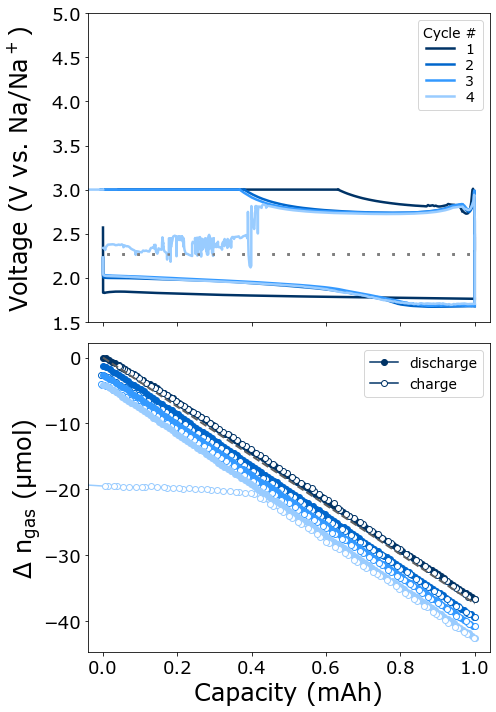

In [18]:
#New batch of 10% binder cathodes - cell cycling on delilah

mc2_cycles = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200224_Na_10%binder_MCMB0203_cycling_CA_cell1/')
mc2_1= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200224_Na_10%binder_MCMB0203_cycling_CA_cell1/200224_Na_10%binder_MCMB0203_CA_cell1_cycle1_Ch1__2020-02-24_12.22_00.txt')
mc2_2= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200224_Na_10%binder_MCMB0203_cycling_CA_cell1/200224_Na_10%binder_MCMB0203_CA_cell1_cycle2_Ch1__2020-02-24_23.17_55.txt')
mc2_3= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200224_Na_10%binder_MCMB0203_cycling_CA_cell1/200224_Na_10%binder_MCMB0203_CA_cell1_cycle3_Ch1__2020-02-25_07.42_14.txt')
mc2_4= read_press ('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200224_Na_10%binder_MCMB0203_cycling_CA_cell1/200224_Na_10%binder_MCMB0203_CA_cell1_cycle4_Ch1__2020-02-25_16.04_05.txt')

colors = ['#001933','#003366', '#0066CC', '#3399FF', '#99CCFF']
fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10)) 

o1=plot_CA_cycles(mc2_cycles[1], mc2_cycles[3], mc2_cycles[4], mc2_cycles[5], mc2_1, 2, 1,'#003366' )
o2=plot_CA_cycles(mc2_cycles[8], mc2_cycles[10], mc2_cycles[11], mc2_cycles[12], mc2_2, 2, 2, '#0066CC', offset=o1)
o3= plot_CA_cycles(mc2_cycles[15], mc2_cycles[17], mc2_cycles[18], mc2_cycles[19], mc2_3, 2, 3, '#3399FF',offset=o1+o2)
plot_CA_cycles(mc2_cycles[22], mc2_cycles[24], mc2_cycles[25], mc2_cycles[26], mc2_4, 2, 4, '#99CCFF',offset=o1+o2+o3)


leg = ax.legend(fontsize=14, loc='upper right', labelspacing=0.15)
leg.set_title('Cycle #',prop={'size':14})
ax2.legend(labels=['discharge', 'charge'], fontsize=14)
#plt.savefig('/Users/kedzie/Desktop/200224_Na_10%binder_MCMB0203_cycling_cell1.pdf', transparent= True, dpi=600, bbox_inches='tight')



